In [1]:
import pandas as pd

df = pd.read_csv('/content/Iris.csv')
display(df.head())

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1. Separate features (X) and target (y)
X = df.drop(['Id', 'Species'], axis=1)
y = df['Species']

print("Original features (X) head:\n", X.head())
print("Original target (y) head:\n", y.head())

# 2. Encode the target variable (y)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("\nEncoded target (y_encoded) head:\n", y_encoded[:5])
print("Unique classes in encoded target:\n", le.classes_)

# 3. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.25, random_state=42)

print(f"\nShape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

# 4. Normalize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nScaled X_train head (first 5 rows, first 3 columns):\n", X_train_scaled[:5, :3])
print("Scaled X_test head (first 5 rows, first 3 columns):\n", X_test_scaled[:5, :3])

Original features (X) head:
    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2
Original target (y) head:
 0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

Encoded target (y_encoded) head:
 [0 0 0 0 0]
Unique classes in encoded target:
 ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']

Shape of X_train: (112, 4)
Shape of X_test: (38, 4)
Shape of y_train: (112,)
Shape of y_test: (38,)

Scaled X_train head (first 5 rows, first 3 columns):
 [[-1.01827123  1.30636523 -1.39489006]
 [-0.7730102   2.46390403 -1.33696359]
 [-0.03722712 -0.77720463  0.74838929]
 [ 0.20803391  0.8433497   0.40083048]
 [ 1.06644751  0.14882642

## Train and Evaluate KNN for different K values

### Subtask:
Iterate through various K values for the KNeighborsClassifier, train the model, make predictions, calculate accuracy, and generate a confusion matrix for each K. Store the accuracy and confusion matrix for each K.


**Reasoning**:
The subtask requires iterating through various K values to train a KNN model, make predictions, calculate accuracy, and generate a confusion matrix for each K. I will use a loop to accomplish this, storing the results in lists as specified.



In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Initialize lists to store results
accuracies = []
confusion_matrices = []
k_values = []

# Iterate through various K values (odd numbers from 1 to 25)
for k in range(1, 26, 2):
    k_values.append(k)

    # Instantiate KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the model
    knn.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = knn.predict(X_test_scaled)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)

    print(f"K = {k}: Accuracy = {accuracy:.4f}")
    print(f"Confusion Matrix for K = {k}:\n{cm}\n")

print("KNN model training and evaluation for various K values completed.")

K = 1: Accuracy = 1.0000
Confusion Matrix for K = 1:
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]

K = 3: Accuracy = 1.0000
Confusion Matrix for K = 3:
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]

K = 5: Accuracy = 1.0000
Confusion Matrix for K = 5:
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]

K = 7: Accuracy = 1.0000
Confusion Matrix for K = 7:
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]

K = 9: Accuracy = 1.0000
Confusion Matrix for K = 9:
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]

K = 11: Accuracy = 1.0000
Confusion Matrix for K = 11:
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]

K = 13: Accuracy = 1.0000
Confusion Matrix for K = 13:
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]

K = 15: Accuracy = 1.0000
Confusion Matrix for K = 15:
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]

K = 17: Accuracy = 1.0000
Confusion Matrix for K = 17:
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]

K = 19: Accuracy = 1.0000
Confusion Matrix for K = 19:
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]

K = 21: Accuracy = 1.0000
Confusion Matrix for K = 21:
[[15  0  0]
 [ 0 11  0]
 

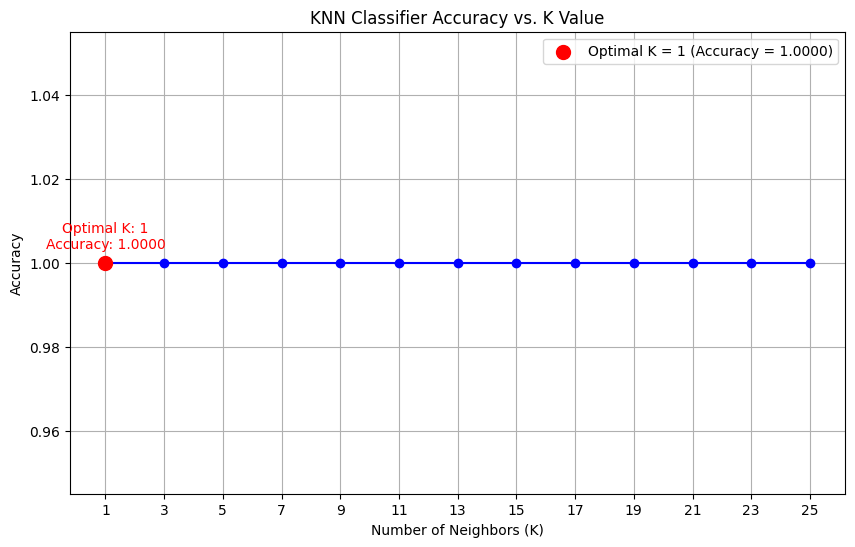

The optimal K value is: 1
The best accuracy achieved is: 1.0000


In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Find the optimal K value and its accuracy
optimal_k_index = np.argmax(accuracies)
optimal_k = k_values[optimal_k_index]
best_accuracy = accuracies[optimal_k_index]

# Plotting the accuracy for different K values
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='blue')
plt.title('KNN Classifier Accuracy vs. K Value')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)

# Highlight the optimal K value
plt.scatter(optimal_k, best_accuracy, color='red', s=100, zorder=5, label=f'Optimal K = {optimal_k} (Accuracy = {best_accuracy:.4f})')
plt.annotate(f'Optimal K: {optimal_k}\nAccuracy: {best_accuracy:.4f}',
             (optimal_k, best_accuracy),
             textcoords="offset points",
             xytext=(0,10),
             ha='center',
             color='red')
plt.legend()
plt.show()

print(f"The optimal K value is: {optimal_k}")
print(f"The best accuracy achieved is: {best_accuracy:.4f}")

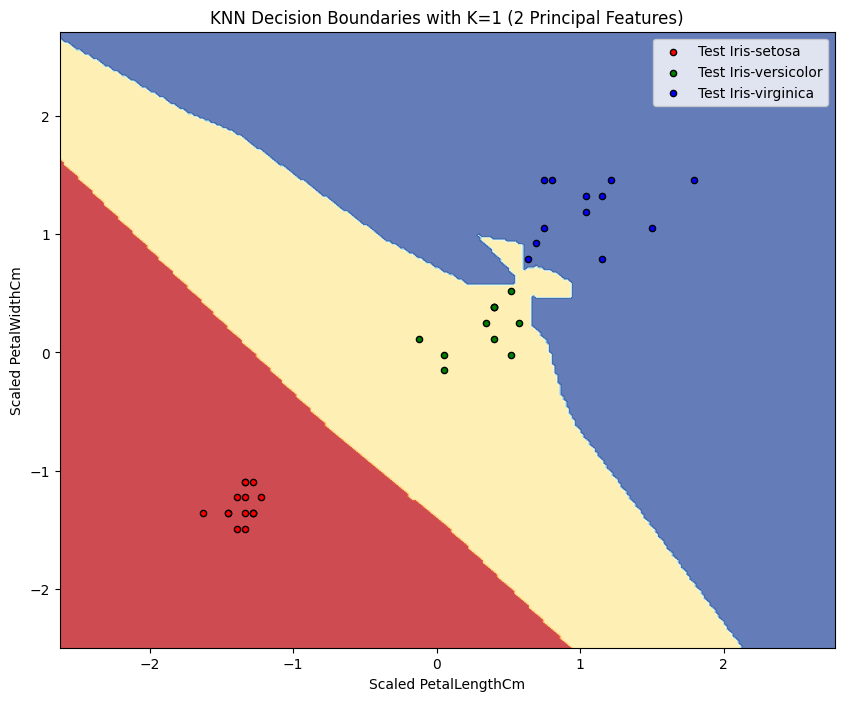

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# 1. Select 'PetalLengthCm' and 'PetalWidthCm' as the two principal features for visualization.
# We need to get the indices of these columns from the original X DataFrame.
petal_features = ['PetalLengthCm', 'PetalWidthCm']
petal_feature_indices = [X.columns.get_loc(col) for col in petal_features]

X_train_2d = X_train_scaled[:, petal_feature_indices]
X_test_2d = X_test_scaled[:, petal_feature_indices]

# 2. Train a KNeighborsClassifier model using the optimal_k value
knn_2d = KNeighborsClassifier(n_neighbors=optimal_k)
knn_2d.fit(X_train_2d, y_train)

# Determine bounds for the meshgrid
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1

# Extend bounds to include test data as well for better visualization
x_min_test, x_max_test = X_test_2d[:, 0].min() - 1, X_test_2d[:, 0].max() + 1
y_min_test, y_max_test = X_test_2d[:, 1].min() - 1, X_test_2d[:, 1].max() + 1

x_min = min(x_min, x_min_test)
x_max = max(x_max, x_max_test)
y_min = min(y_min, y_min_test)
y_max = max(y_max, y_max_test)

# Create a meshgrid
h = .02 # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# 4. Use the trained KNN model to predict the class for each point in the meshgrid
Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)

# Plot the test data points
# Define colors for each class based on the encoded target
colors = ['red', 'green', 'blue']
for i, class_label in enumerate(le.classes_):
    plt.scatter(X_test_2d[y_test == i, 0],
                X_test_2d[y_test == i, 1],
                c=colors[i],
                s=20,
                edgecolor='k',
                label=f'Test {class_label}')

plt.xlabel(f'Scaled {petal_features[0]}')
plt.ylabel(f'Scaled {petal_features[1]}')
plt.title(f'KNN Decision Boundaries with K={optimal_k} (2 Principal Features)')
plt.legend()
plt.show()
